# Field Goals

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
play_types = {"field_goal_good": 59,
              "field_goal_missed": 60,
              "field_goal_blocked": 18,
              "field_goal_missed_return": 40,
              "field_goal_missed_return_td": 41,
              "field_goal_blocked_return_td": 38}

In [3]:
seasons = np.arange(2000, 2020, 1) 
weeks = np.arange(1, 14, 1)

In [5]:
season_list = []
week_list = []
kicks_json = []

for season in seasons:
    for week in weeks:
        for key in play_types:
            parameters = {"year": season, "seasonType": "regular", "offense": "Washington", "playType": play_types[key], "week": week}
            response = requests.get("https://api.collegefootballdata.com/plays", params=parameters)
            kicks = response.json()
            for kick in kicks:
                season_list.append(season)
                week_list.append(week)
                kicks_json.append(kick)

In [6]:
from pandas.io.json import json_normalize

kick_df = json_normalize(kicks_json)
kick_df["season"] = season_list
kick_df["week"] = week_list
kick_df.head()

C:\Users\wwtar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,offense,offense_conference,defense,defense_conference,home,away,offense_score,defense_score,game_id,...,distance,scoring,yards_gained,play_type,play_text,ppa,clock.minutes,clock.seconds,season,week
0,2324201943201,Washington,Pac-10,Ohio State,Big Ten,Ohio State,Washington,3,28,232420194,...,7,False,0,Blocked Field Goal,"Huskies 35 yard field goal attempt blocked, re...",None,6,58,2003,2
1,2328402640901,Washington,Pac-10,Nevada,Western Athletic,Washington,Nevada,0,14,232840264,...,11,False,0,Blocked Field Goal,"Huskies 37 yard field goal attempt blocked, re...",None,14,40,2003,8
2,2328402641401,Washington,Pac-10,Nevada,Western Athletic,Washington,Nevada,0,14,232840264,...,8,False,0,Blocked Field Goal,"Huskies 38 yard field goal attempt blocked, re...",None,9,0,2003,8
3,2328402642209,Washington,Pac-10,Nevada,Western Athletic,Washington,Nevada,7,14,232840264,...,6,False,0,Blocked Field Goal,"Huskies 43 yard field goal attempt blocked, re...",None,11,0,2003,8
4,252462005025,Washington,Pac-10,Air Force,Mountain West,Air Force,Washington,3,0,252462005,...,4,False,0,Field Goal Good,"Evan Knudson field goal attempt from 40 GOOD, ...",-0.1724792983509733,5,39,2005,1


In [7]:
kick_df.shape

(257, 29)

In [8]:
kick_df.play_type.unique()

array(['Blocked Field Goal', 'Field Goal Good', 'Field Goal Missed'],
      dtype=object)

In [9]:
colors = {"Blocked Field Goal": "black",
          "Field Goal Good": "green",
          "Field Goal Missed": "red"}

In [91]:
markers = {"Blocked Field Goal": "s",
          "Field Goal Good": "o",
          "Field Goal Missed": "X"}

In [92]:
kick_df["color"] = kick_df["play_type"].map(colors)
kick_df["marker"] = kick_df["play_type"].map(markers)

In [93]:
kick_df = kick_df[kick_df["season"] >= 2005]

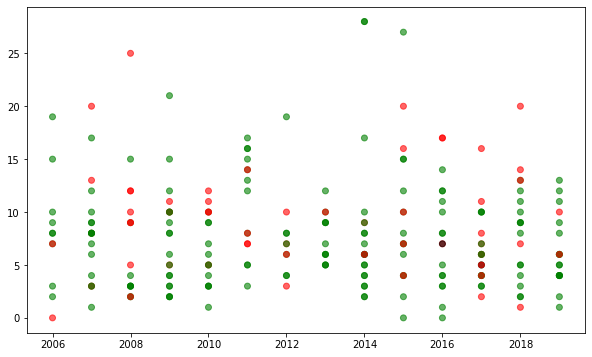

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(kick_df.season, kick_df.distance, c=kick_df.color, alpha=0.6)
plt.show()

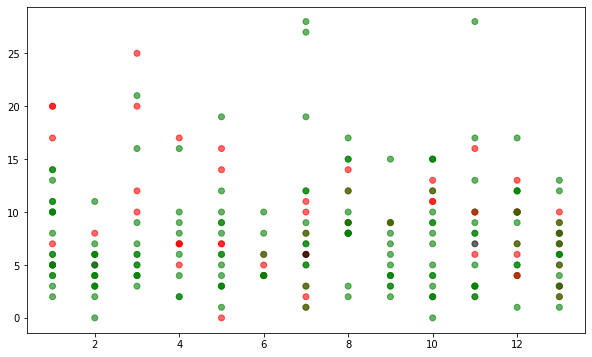

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(kick_df.week, kick_df.distance, c=kick_df.color, alpha=0.6)
plt.show()

https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/

fig size: 72.0 DPI, size in inches [10.  6.]


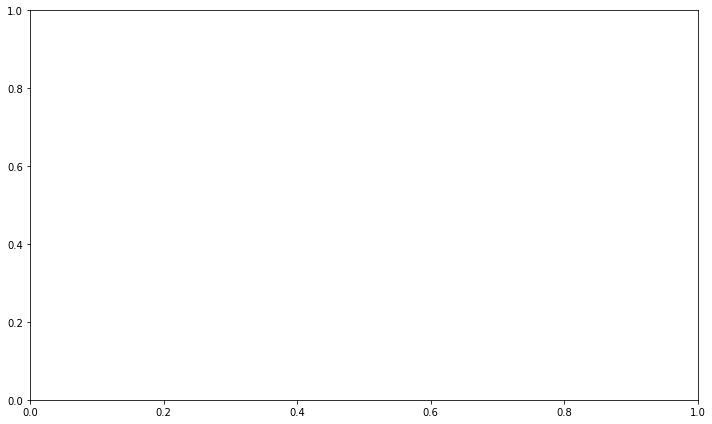

In [96]:
from matplotlib.animation import FuncAnimation
import sys

fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

In [97]:
# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
#ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
#line, = ax.plot(x, x - 5, 'r-', linewidth=2)

In [98]:
seasons = list(kick_df.season.unique())
seasons[6]

2012

In [73]:
weeks = np.arange(1, 13, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [132]:
def update(i):
    curr_season = seasons[i]
    curr_data = kick_df[kick_df["season"] == curr_season]
    label = "{0} Season".format(curr_season)
    ax.clear()
    markers = curr_data.marker.unique()
    for marker in markers:
        marker_data = curr_data[curr_data["marker"] == marker]
        ax.scatter(marker_data.week, marker_data.distance, c=marker_data.color, alpha=0.8, marker=marker)
    ax.set_xlim(0.5, 12.5)
    ax.set_ylim(-0.5, 30)
    ax.set_xlabel(label)
    return line, ax

In [133]:
anim = FuncAnimation(fig, update, frames=np.arange(0, len(seasons)), interval=500)
anim.save("field_goals.gif", dpi=80, writer='imagemagick')
plt.show()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


o
X
o
X
o
X
o
X
o
X
o
X
o
X
X
o
o
X
o
s
X
o
X
o
X
s
o
s
X
o
X
o
X
